# Multi-mode Cepheid Lightcurve

Figure 11.4 from Chapter 11 of Stellar Structure & Evolution Pinsonneault & Ryden, Cambridge University Press.

Light curve of multi-mode classical Cepheid star OGLE-LMC-CEP-0832. Three panels:
 * light curve phased by the fundamental period, p0 = 3.893 d, 
 * The isolated fundamental mode
 * The isolated first overtone mode

Periods and ephemeris zero points are:
 * Fundamental: P=3.8928031$\pm$0.0000118 d T0=725.14061
 * 1st Overtone: P=2.7963769$\pm$0.0000105 T0=725.46472
 
See Soszynski et al. [2008, AcA, 58, 163](http://adsabs.harvard.edu/abs/2008AcA....58..163S) for other details.

In [1]:
%matplotlib inline

import os
import sys
import math
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [2]:
plotFile = 'Fig11_3.png' 

# graphic aspect ratio = width/height

aspect = 4.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 8
labelFontSize = 6
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Light Curve Data

Data are from the OGLE-3 database for LMC Cepheid 
[OGLE-LMC-CEP-0832](ftp://ftp.astrouw.edu.pl/ogle/ogle3/OIII-CVS/lmc/cep/phot/I/OGLE-LMC-CEP-0832.dat).  A 
column header was added for convenience.  The isolated fundamental and first overtone light curves were 
provided by Radek Poleski.

In [3]:
# Full light curve

photFile = 'OGLE-LMC-CEP-0832.txt'
photData = pd.read_csv(photFile,sep=r'\s+')
epFull = np.array(photData['time']) # units of days (ep = "epoch")
mFull = np.array(photData['mag'])

# Isolated fundamental mode 

photFile = 'OGLE-LMC-CEP-0832_a.txt'
photData = pd.read_csv(photFile,sep=r'\s+')
epF = np.array(photData['time']) # units of days
mF = np.array(photData['mag'])

# Isolated first overtone mode 

photFile = 'OGLE-LMC-CEP-0832_b.txt'
photData = pd.read_csv(photFile,sep=r'\s+')
epO1 = np.array(photData['time']) # units of days
mO1 = np.array(photData['mag'])

# Fundamental Mode period and ephemeris zero point

PF = 3.8928031 # days
errPF = 0.0000118
t0F = 725.14061 # days

# First Overtone Mode period and ephemeris zero point

PO1 = 2.7963769
errPO1 = 0.0000105
t0O1 = 725.46472

## Phased light curves

A lightcurve is phased to a particular period with this formula:
$$
\phi = \frac{t-t_0}{P}-{\rm floor}\left(\frac{t-t_0}{P}\right)
$$
where $t$ is the observation time, $t_0$ is the ephemeris zero-point, and $P$ is the period.  All are in the same time units (e.g., days).

Create two light curves to start, one phased to the fundamental, the other to the first overtone.

In [4]:
# Phase the full light curve to the first fundamental mode

tmp = (epFull-t0F)/PF
phFull = tmp - np.floor(tmp)

# Phase the isolated fundamental mode light curve

tmp = (epF-t0F)/PF
phF = tmp - np.floor(tmp)

# Phase the isolated first overtone mode light curve

tmp = (epO1-t0O1)/PO1
phO1 = tmp - np.floor(tmp)

## Figure 11.3

3 panel side-by-side plot, 
 * full mixed-mode phased lightcurve
 * isolated fundamental mode lightcurve
 * isolated first overtone lightcurve

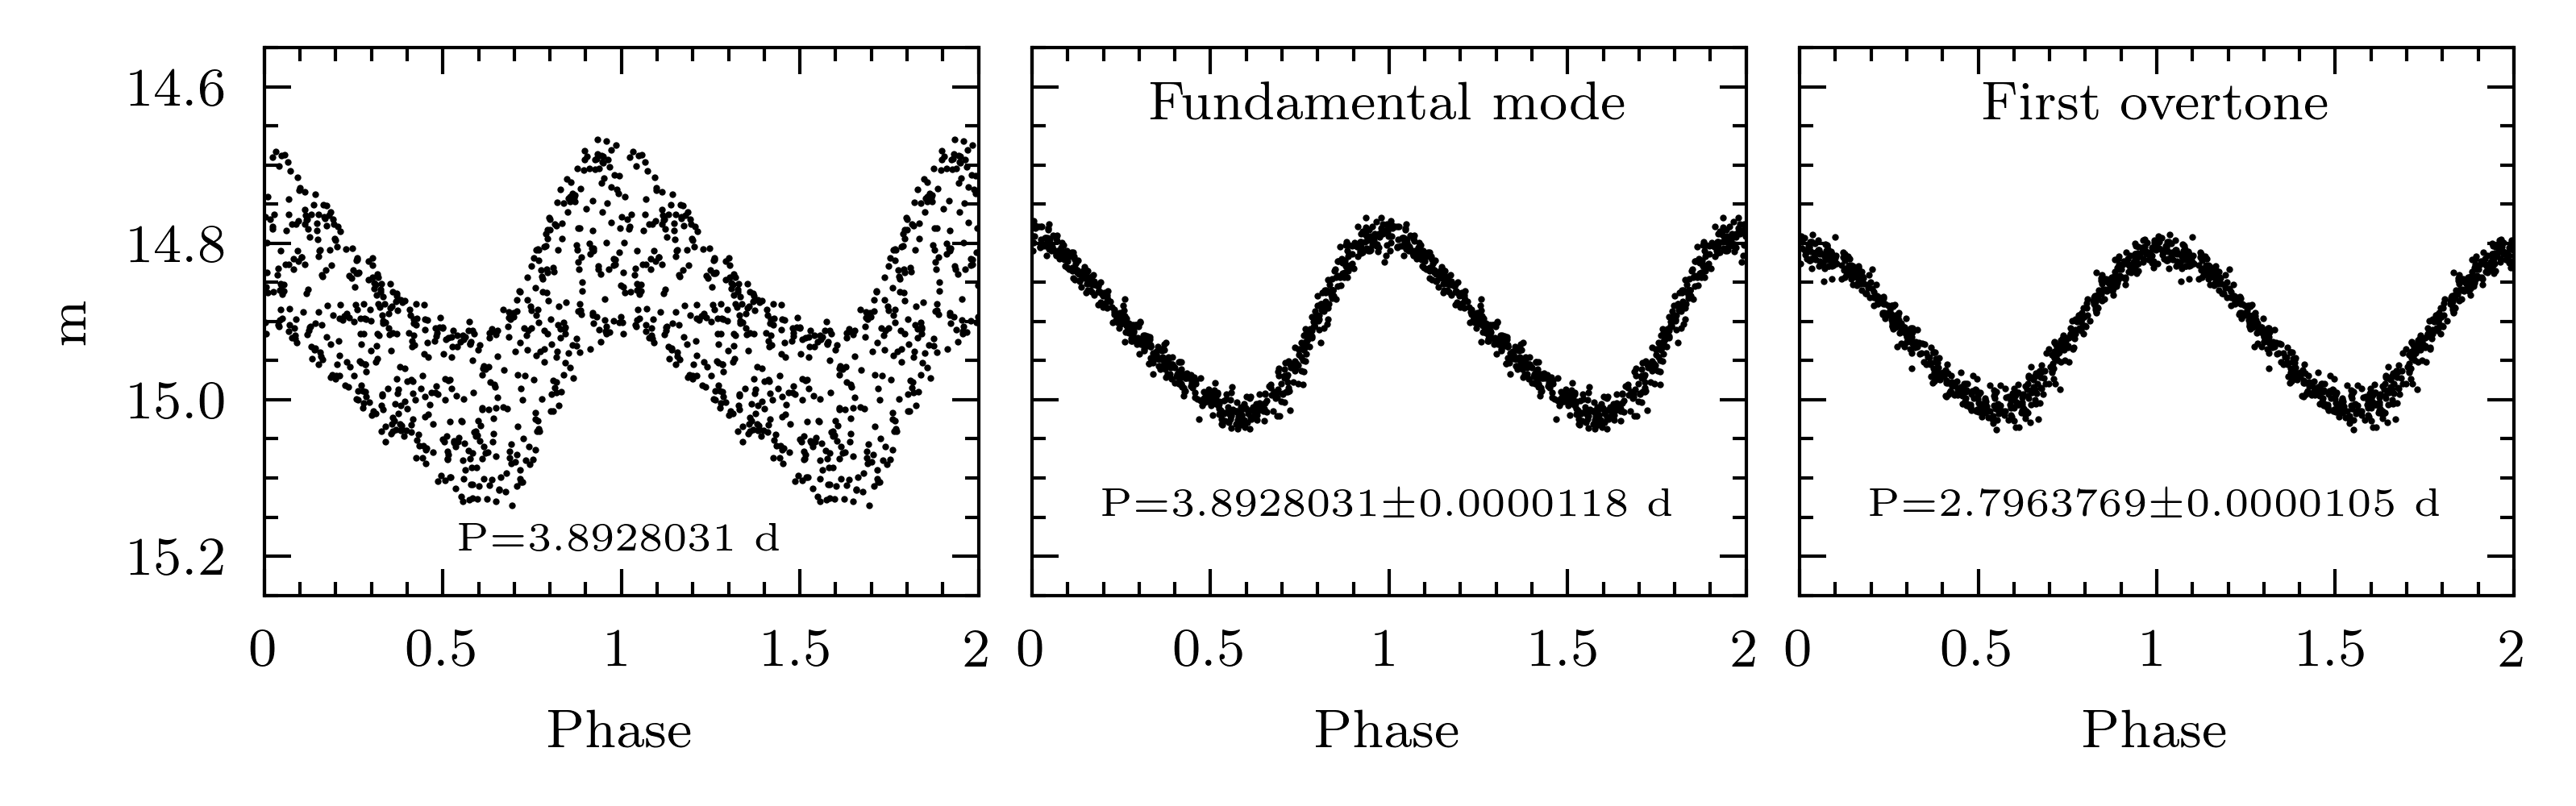

In [5]:
fig,ax = plt.subplots(1,3,figsize=(wInches,hInches),dpi=dpi)
    
fig.subplots_adjust(wspace=0.075, hspace=0.0)

# Common limits and plotting windows for all three panels

minPh = 0.0
maxPh = 2.0
minM = 15.25
maxM = 14.55

for i in range(3):
    ax[i].tick_params('both',length=4,width=lwidth,which='major',direction='in',top='on',right='on')
    ax[i].tick_params('both',length=2,width=lwidth,which='minor',direction='in',top='on',right='on')
    ax[i].set_xlim(minPh,maxPh)
    ax[i].xaxis.set_major_locator(MultipleLocator(0.5))
    ax[i].xaxis.set_minor_locator(MultipleLocator(0.1))
    ax[i].set_xlabel(r'Phase',fontsize=axisFontSize)
    ax[i].set_ylim(minM,maxM)
    ax[i].yaxis.set_major_locator(MultipleLocator(0.2))
    ax[i].yaxis.set_minor_locator(MultipleLocator(0.05))
    ax[i].xaxis.set_ticks([0,0.5,1.0,1.5,2.0])
    ax[i].xaxis.set_ticklabels(['0','0.5','1','1.5','2'])
    if i == 0:
        ax[i].set_ylabel(r'm',fontsize=axisFontSize)
    if i > 0:
        ax[i].axes.yaxis.set_ticklabels([])
        
# Label Y locations

yP = 15.18
yM = 14.625

# Full phased light curve - plot twice: phase and phase+1

ax[0].plot(phFull,mFull,'.',ms=2,mew=0,color='black')
ax[0].plot(1.0+phFull,mFull,'.',ms=2,mew=0,color='black')
ax[0].text(1.0,yP,r'P=%.7f d' % (PF),color='black',va='center',ha='center',
           fontsize=labelFontSize)

# Isolated fundamental mode light curve

ax[1].plot(phF,mF,'.',ms=2,mew=0,color='black')
ax[1].plot(1.0+phF,mF,'.',ms=2,mew=0,color='black')
ax[1].text(1.0,yM,'Fundamental mode',color='black',va='center',ha='center',
           fontsize=axisFontSize)
ax[1].text(1.0,yP-0.05,r'P=%.7f$\pm$%.7f d' % (PF,errPF),color='black',va='center',ha='center',
           fontsize=labelFontSize)

# Isolated first overtone light curve

ax[2].plot(phO1,mO1,'.',ms=2,mew=0,color='black')
ax[2].plot(1.0+phO1,mO1,'.',ms=2,mew=0,color='black')
ax[2].text(1.0,yM,'First overtone',color='black',va='center',ha='center',
           fontsize=axisFontSize)
ax[2].text(1.0,yP-0.05,r'P=%.7f$\pm$%.7f d' % (PO1,errPO1),color='black',va='center',ha='center',
           fontsize=labelFontSize)

# make the plot

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')